In [32]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import timeit
from joblib import Parallel, delayed
from PIL import Image
from skimage.metrics import structural_similarity as ssim
from unsupervised.dim_red import PCA, SVD, TSNE, ParallelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.metrics import mean_squared_error, structural_similarity
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA as SklearnPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE as SklearnTSNE

## 1.Simulate any random rectangular matrix A.

In [2]:
# Create matrix A
A = np.random.rand(4, 3)
A

array([[0.39900582, 0.33179031, 0.21439328],
       [0.06074323, 0.05630286, 0.58111586],
       [0.48692251, 0.05897179, 0.17269603],
       [0.25237101, 0.0910937 , 0.24134802]])

### - What is the rank and trace of A?

In [3]:
# Rank and trace of A
Rank = np.linalg.matrix_rank(A)
print(f'Rank is {Rank}.The rank of a matrix is the maximum number of linearly independent rows or columns in the matrix.')

Rank is 3.The rank of a matrix is the maximum number of linearly independent rows or columns in the matrix.


In [4]:
Trace = np.matrix.trace(A)
print(f'Trace is {np.round(Trace, 3)}')

Trace is 0.628


In [5]:
print(f"Trace of the rectangular matrix: {np.linalg.svd(A, compute_uv=False).sum()}")

Trace of the rectangular matrix: 1.5596349982833102


##### To define the trace of a rectangular matrix  A is by considering it as the sum of its singular values. Singular values of a rectangular matrix are obtained as the square roots of the eigenvalues of either   A^TA or   AA^T  . This broader definition allows for the application of the trace concept beyond square matrices.

### - What is the determinant of A?

### The determinant of a matrix is defined only for square matrices.

### - Can you invert A? How?

#### Rectangular matrices cannot be inverted because their determinants are not defined, unlike square matrices where a non-zero determinant is necessary for invertibility. In such cases, a pseudo-inverse can be used, but it doesn't perfectly replicate a true inverse and comes with computational compromises.

In [6]:
# Calcular la seudoinversa
pseudo_inverse_A = np.linalg.pinv(A)
pseudo_inverse_A

array([[-0.41362952, -0.72080218,  2.21354246,  0.5190802 ],
       [ 3.68053307, -0.3653813 , -2.75271901, -0.42001195],
       [-0.37368303,  1.74343356, -0.08760683,  0.34020409]])

### - How are eigenvalues and eigenvectors of A’A and AA’ related? What interesting differences can you notice between both?

Eigenvalues and eigenvectors of \(A^TA\) and \(AA^T\) share the same eigenvalues, which are the squares of the singular values of matrix \(A\). However, their corresponding eigenvectors differ:

- **For \(A^TA\):** Eigenvectors align with the right singular vectors of \(A\).

- **For \(AA^T\):** Eigenvectors align with the left singular vectors of \(A\).


Dimensions:
- \(A^TA\) is a square matrix of size \(n x n\), where \(n\) is the number of columns in \(A\).
- \(AA^T\) is a square matrix of size \(m x m\), where \(m\) is the number of rows in \(A\).s in \(A\).


## 2.Add a steady, well-centered picture of your face to a shared folder alongside your classmates.
### Edit the picture to be 256x256 pixels, grayscale and plot the edited face.

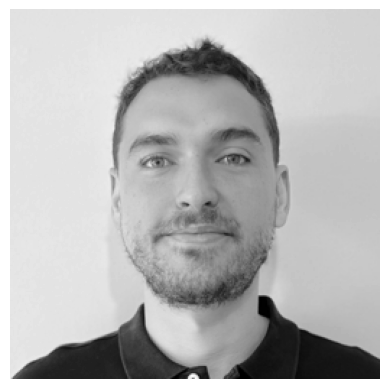

In [7]:
# Open the image
image_path = "RawPablo_uribe.jpeg"
original_image = Image.open(image_path)

# Resize the image to 256x256 pixels
resized_image = original_image.resize((256, 256))
# Convert the image to grayscale
grayscale_image = resized_image.convert("L")
# Save the edited image
output_path = "Pablo_uribe.jpg"
grayscale_image.save(output_path)

# Plot the grayscale image
plt.imshow(grayscale_image, cmap='gray')  # cmap='gray' specifies that the image is grayscale
plt.axis('off')  # Turn off axis labels
plt.show()

### - Calculate and plot the average face of the cohort.

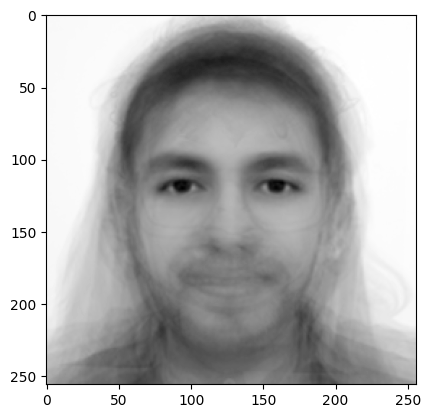

In [8]:
# Set the path to your image folder
folder_path = "Cohort_pics"

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Initialize variables to store total pixel values
total_pixels = np.zeros((256, 256), dtype=np.float32)

# Iterate through each image in the folder
for image_file in image_files:
    # Open the image
    image_path = os.path.join(folder_path, image_file)
    img = Image.open(image_path)

    # Resize the image to 256x256 pixels
    img = img.resize((256, 256))

    # Convert the image to grayscale
    img_array = np.array(img.convert("L"), dtype=np.float32)
    # plt.imshow(img_array, cmap='gray')
    # plt.show()
    # Accumulate pixel values
    total_pixels += img_array

# Calculate the average face
average_face = total_pixels / len(image_files)

# Convert the average face back to uint8 for display
average_face_uint8 = average_face.astype(np.uint8)

# Plot the average face using matplotlib
plt.imshow(average_face, cmap='gray')
plt.show()


#For this point i use one set of pictures that Alejandro Martinez modified to improve the results


### - How distant is your face from the average? How would you measure it?

In [9]:
your_face_array = np.array(grayscale_image, dtype=np.float32)

# Calculate MSE between your face and the average face
mse = np.mean((your_face_array - average_face)**2)

# Calculate Structural Similarity Index (SSI)
ssi_index = ssim(your_face_array, average_face, data_range=average_face.max() - average_face.min())

print(f"Mean Squared Error (MSE) between your face and the average face: {mse}")
print(f"Structural Similarity Index (SSI) between your face and the average face: {ssi_index}")

Mean Squared Error (MSE) between your face and the average face: 2866.75341796875
Structural Similarity Index (SSI) between your face and the average face: 0.47500621007744304


**Conclusion**
Considering both metrics, my face exhibits a substantial similiraty from the average face. Being a man and having a beard, I already belong to a large % of the phenotype of the group, so in the structural similarity index I have a coincidence value of almost 50%.The high MSE implies significant dissimilarity in pixel values, and the low SSI suggests a lack of structural resemblance in terms of textures and patterns

## 3. Let’s create the unsupervised Python package

### **Package created**



## 4. Apply SVD over the picture of your face, progressively increasing the number of singular values used. Is there any point where you can say the image is appropriately reproduced? How would you quantify how different your photo and the approximation are?

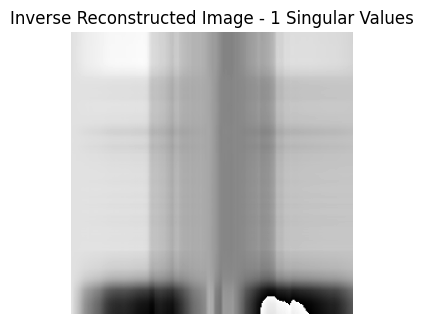

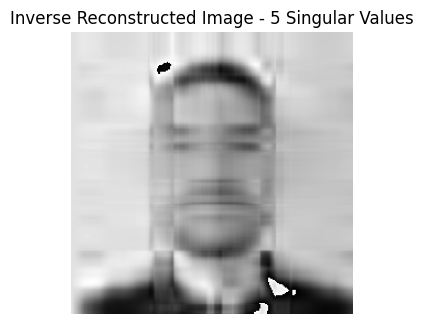

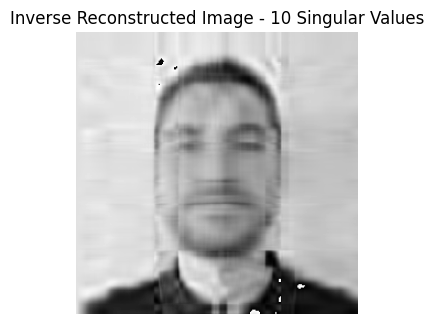

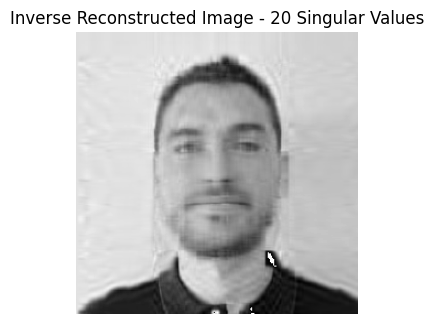

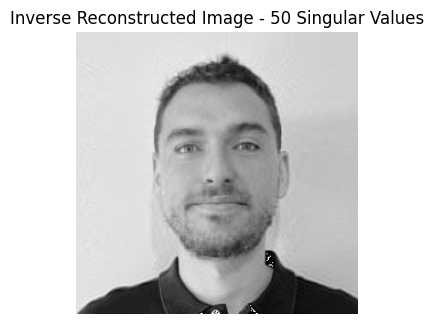

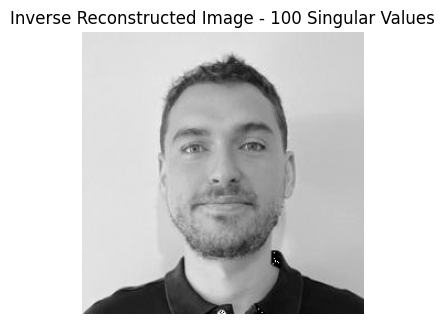

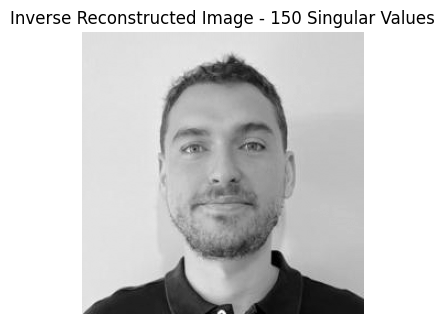

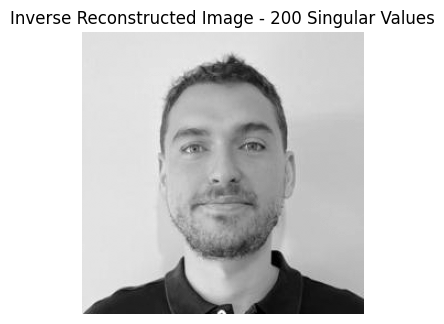

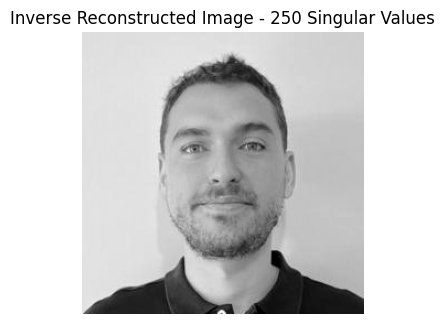

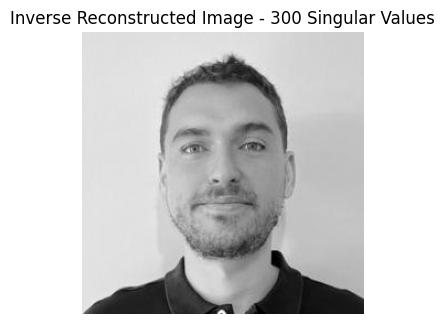

In [10]:
# Load the image
img_path = "Cohort_pics/Pablo_uribe.jpg"
img = np.array(Image.open(img_path).convert('L'))

# Convert the image to a NumPy array
img_array = np.array(img)

# Initialize the SVD model
svd_model = SVD.SVD(n_components=10)

# Apply SVD progressively and analyze the results
num_singular_values_list = [1, 5, 10, 20, 50, 100,150, 200,250,300]
original_img = img_array.copy()  # Save a copy of the original image for comparison

for num_singular_values in num_singular_values_list:
    # Update the number of components in the SVD model
    svd_model.n_components = num_singular_values

    # Apply SVD and reconstruct the image
    reconstructed_img = svd_model.fit_transform(img_array)

    # Apply inverse transformation to get back the original image
    inverse_reconstructed_img = svd_model.inverse_transform(reconstructed_img)

    # Display or save the reconstructed image and the difference
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 2)
    plt.imshow(inverse_reconstructed_img.astype(np.uint8), cmap='gray')
    plt.title(f'Inverse Reconstructed Image - {num_singular_values} Singular Values')
    plt.axis('off')

    plt.show()


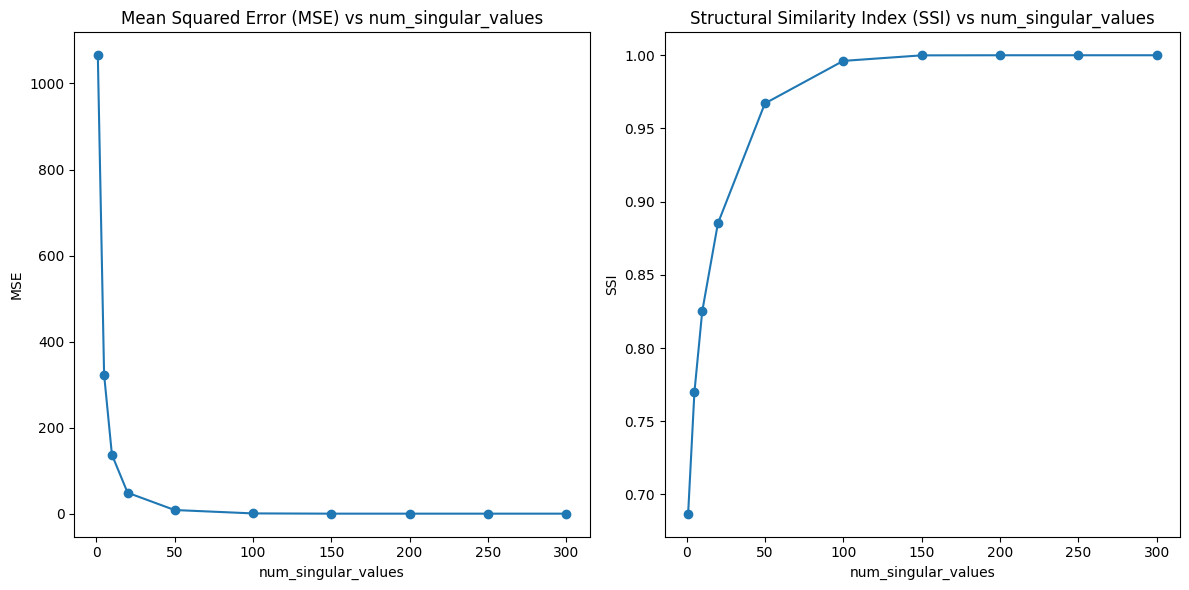

In [11]:
# Assuming original_img and img_array are NumPy arrays
original_img = img_array.copy()  # Save a copy of the original image for comparison
num_singular_values_list = [1, 5, 10, 20, 50, 100, 150, 200, 250, 300]
mse_values = []
ssim_values = []

for num_singular_values in num_singular_values_list:
    # Update the number of components in the SVD model
    svd_model.n_components = num_singular_values

    # Apply SVD and reconstruct the image
    reconstructed_img = svd_model.fit_transform(img_array)

    # Apply inverse transformation to get back the original image
    inverse_reconstructed_img = svd_model.inverse_transform(reconstructed_img)

    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(original_img, inverse_reconstructed_img)
    mse_values.append(mse)

    # Compute Structural Similarity Index (SSI)
    ssim = structural_similarity(original_img, inverse_reconstructed_img, data_range=inverse_reconstructed_img.max() - inverse_reconstructed_img.min())
    ssim_values.append(ssim)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(num_singular_values_list, mse_values, marker='o')
plt.title('Mean Squared Error (MSE) vs num_singular_values')
plt.xlabel('num_singular_values')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.plot(num_singular_values_list, ssim_values, marker='o')
plt.title('Structural Similarity Index (SSI) vs num_singular_values')
plt.xlabel('num_singular_values')
plt.ylabel('SSI')

plt.tight_layout()
plt.show()


In [12]:
ssim_values

[0.6868614741380624,
 0.7697094071285902,
 0.8251103863672251,
 0.885128550030515,
 0.9670887226635536,
 0.9961474005552797,
 0.9999258127622622,
 0.9999989007155242,
 0.9999999999999305,
 0.999999999999965]

**Conclusion**
The Structural Similarity Index (SSI) surpasses 0.9, specifically reaching 0.967 at 50 singular values, indicating highly effective image reproduction with a high level of structural similarity to the original. Simultaneously, in the case of Mean Squared Error (MSE), reaching 50 singular values already results in an error converging to 0, signifying accurate image reproduction. The choice between SSI and MSE depends on the need to evaluate visual similarity or numerical precision, respectively.

## 5. Train a naive logistic regression on raw MNIST images to distinguish between 0s and 8s. We are calling this our baseline. What can you tell about the baseline performance?

In [13]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Filter images labeled as 0s and 8s
indices_0s = (y_train == 0)
indices_8s = (y_train == 8)

X_train_0s = X_train[indices_0s]
X_train_8s = X_train[indices_8s]
y_train_0s = y_train[indices_0s]
y_train_8s = y_train[indices_8s]


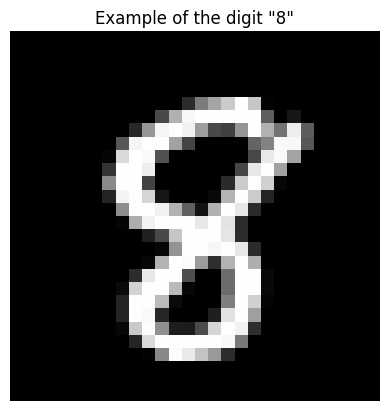

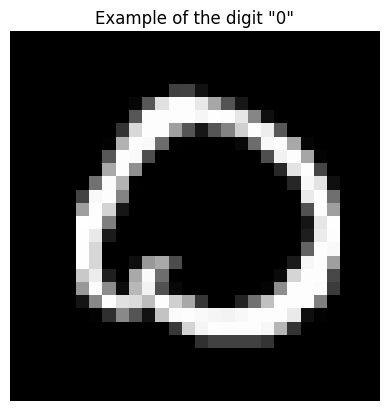

In [14]:
# Display an example image of the digit '8'
plt.imshow(X_train_8s[200], cmap='gray')  # Display the image
plt.title('Example of the digit "8"')  # Add a title to the plot
plt.axis('off')  # Turn off axis labels for better visualization
plt.show()

# Display an example image of the digit '0'
plt.imshow(X_train_0s[100], cmap='gray')  # Display the image
plt.title('Example of the digit "0"')  # Add a title to the plot
plt.axis('off')  # Turn off axis labels for better visualization
plt.show()

In [15]:
# Combine images and labels for 0s and 8s
X_combined = np.concatenate((X_train_0s, X_train_8s), axis=0)
y_combined = np.concatenate((y_train_0s, y_train_8s), axis=0)

# Flatten the images and normalize pixel values
X_flattened = X_combined.reshape(X_combined.shape[0], -1)  # Flatten images
X_normalized = X_flattened / 255.0  # Normalize pixel values to [0, 1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_combined, test_size=0.2, random_state=42)

# Train a Naive Logistic Regression Model
logistic_regression_model = LogisticRegression(random_state=42)

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy:.2f}")

Accuracy of the Logistic Regression model: 0.99


**Conclusion**
The logistic regression model, trained on raw MNIST images for distinguishing between 0s and 8s, achieves a remarkable accuracy of 0.99. This high accuracy underscores its effectiveness in predicting digits based on pixel values. To get a complete picture, evaluating precision, recall, and the confusion matrix is crucial for insights into class-specific performance and potential optimization areas.

## 6. Now, apply dimensionality reduction using all your algorithms to train the model with only 2 features per image. 
- Plot the 2 new features generated by your algorithm
- Does this somehow impact the performance of your model?

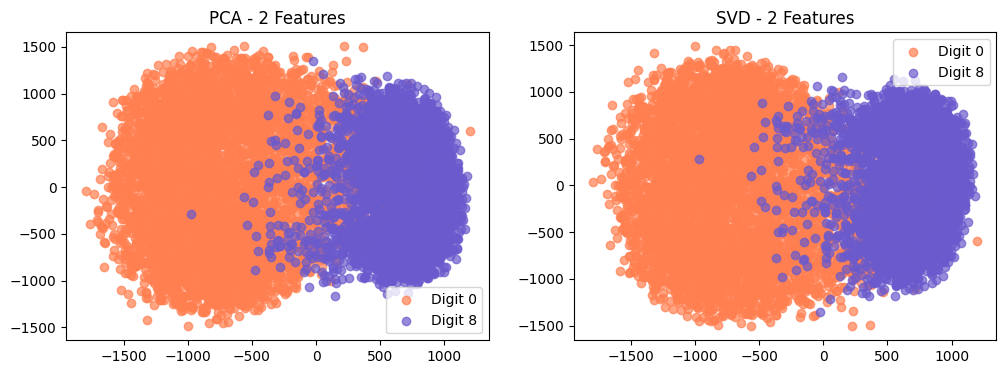

Accuracy with PCA: 0.96
Accuracy with SVD: 0.96


In [16]:
# Assuming X_train_0s and X_train_8s are your flattened images for 0s and 8s
X_train_0s_flatten = X_train_0s.reshape(X_train_0s.shape[0], -1)
X_train_8s_flatten = X_train_8s.reshape(X_train_8s.shape[0], -1)

# Combine the data
X_combined = np.vstack((X_train_0s_flatten, X_train_8s_flatten))
y_combined = np.hstack((np.zeros(X_train_0s_flatten.shape[0]), np.ones(X_train_8s_flatten.shape[0])))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Apply PCA for dimensionality reduction
pca_model = PCA.PCA(n_components=2)
X_train_pca = pca_model.fit_transform(X_train)

# Apply SVD for dimensionality reduction
svd_model = SVD.SVD(n_components=2)
X_train_svd = svd_model.fit_transform(X_train)

# Train Logistic Regression models on reduced data
model_pca = LogisticRegression()
model_svd = LogisticRegression()

model_pca.fit(X_train_pca, y_train)
model_svd.fit(X_train_svd, y_train)

# Predictions on the test set
X_test_pca = pca_model.transform(X_test)
X_test_svd = svd_model.transform(X_test)

y_pred_pca = model_pca.predict(X_test_pca)
y_pred_svd = model_svd.predict(X_test_svd)

# Evaluate accuracy
accuracy_pca = accuracy_score(y_test, y_pred_pca)
accuracy_svd = accuracy_score(y_test, y_pred_svd)

# Plot the 2 new features generated by PCA
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], label='Digit 0', alpha=0.7,color='coral')
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], label='Digit 8', alpha=0.7,color='slateblue')
plt.title('PCA - 2 Features')
plt.legend()

# Plot the 2 new features generated by SVD
plt.subplot(1, 2, 2)
plt.scatter(X_train_svd[y_train == 0, 0], X_train_svd[y_train == 0, 1], label='Digit 0', alpha=0.7,color='coral')
plt.scatter(X_train_svd[y_train == 1, 0], X_train_svd[y_train == 1, 1], label='Digit 8', alpha=0.7,color='slateblue')
plt.title('SVD - 2 Features')
plt.legend()

plt.show()

# Output the accuracy for PCA and SVD
print(f'Accuracy with PCA: {accuracy_pca:.2f}')
print(f'Accuracy with SVD: {accuracy_svd:.2f}')


In [17]:
# from unsupervised.dim_red import PCA, SVD, TSNE
# # Apply t-SNE for dimensionality reduction using the provided TSNE class
# tsne_model = TSNE.TSNE(n_components=2, perplexity=30.0, learning_rate=200.0, n_iter=1000)
# X_train_tsne = tsne_model.fit_transform(X_train)

# # Train Logistic Regression model on t-SNE reduced data
# model_tsne = LogisticRegression()
# model_tsne.fit(X_train_tsne, y_train)

# # Predictions on the test set
# X_test_tsne = tsne_model.transform(X_test)
# y_pred_tsne = model_tsne.predict(X_test_tsne)

# # Evaluate accuracy
# accuracy_tsne = accuracy_score(y_test, y_pred_tsne)

# # Plot the 2 new features generated by t-SNE
# plt.scatter(X_train_tsne[y_train == 0, 0], X_train_tsne[y_train == 0, 1], label='Digit 0', alpha=0.7)
# plt.scatter(X_train_tsne[y_train == 1, 0], X_train_tsne[y_train == 1, 1], label='Digit 8', alpha=0.7)
# plt.title('t-SNE - 2 Features')
# plt.legend()

**Conclusion:**
The developed code, involving t-SNE for dimensionality reduction and subsequent logistic regression training, is commented out due to its inefficiency and prolonged execution time. This is often observed with t-SNE, particularly with large datasets, where the algorithm's computational complexity can lead to impractical processing times. 


## 7. Repeat the process above but now using the built-in algorithms in the Scikit-Learn library. How different are these results from those of your implementation? Why?

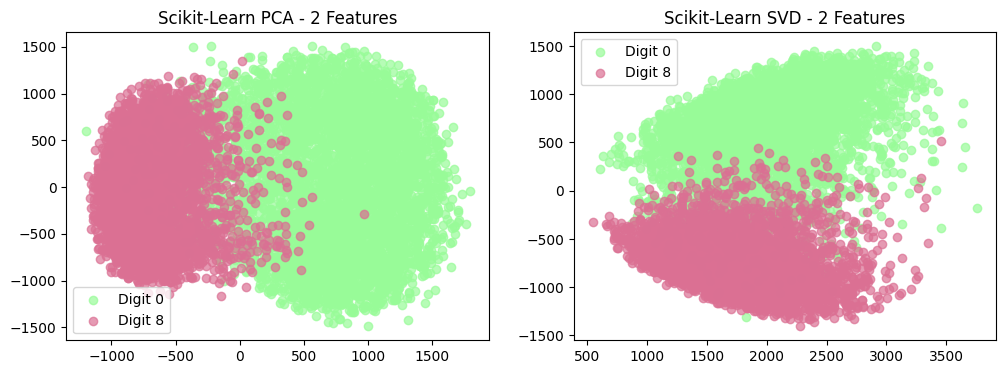

Accuracy with Scikit-Learn PCA: 0.96
Accuracy with Scikit-Learn SVD: 0.95


In [18]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Filter images labeled as 0s and 8s
indices_0s = (y_train == 0)
indices_8s = (y_train == 8)

X_train_0s = X_train[indices_0s]
X_train_8s = X_train[indices_8s]
y_train_0s = y_train[indices_0s]
y_train_8s = y_train[indices_8s]

# Flatten the images
X_train_0s_flatten = X_train_0s.reshape(X_train_0s.shape[0], -1)
X_train_8s_flatten = X_train_8s.reshape(X_train_8s.shape[0], -1)

# Combine the data
X_combined_sklearn = np.vstack((X_train_0s_flatten, X_train_8s_flatten))
y_combined_sklearn = np.hstack((np.zeros(X_train_0s_flatten.shape[0]), np.ones(X_train_8s_flatten.shape[0])))

# Split the data into training and testing sets
X_train_sklearn, X_test_sklearn, y_train_sklearn, y_test_sklearn = train_test_split(X_combined_sklearn, y_combined_sklearn, test_size=0.2, random_state=42)

# Apply PCA from Scikit-Learn for dimensionality reduction
pca_sklearn = SklearnPCA(n_components=2)
X_train_pca_sklearn = pca_sklearn.fit_transform(X_train_sklearn)

# Apply Truncated SVD from Scikit-Learn for dimensionality reduction
svd_sklearn = TruncatedSVD(n_components=2)
X_train_svd_sklearn = svd_sklearn.fit_transform(X_train_sklearn)

# Train Logistic Regression models on Scikit-Learn reduced data
model_pca_sklearn = LogisticRegression()
model_svd_sklearn = LogisticRegression()

model_pca_sklearn.fit(X_train_pca_sklearn, y_train_sklearn)
model_svd_sklearn.fit(X_train_svd_sklearn, y_train_sklearn)

# Predictions on the test set for Scikit-Learn models
X_test_pca_sklearn = pca_sklearn.transform(X_test_sklearn)
X_test_svd_sklearn = svd_sklearn.transform(X_test_sklearn)

y_pred_pca_sklearn = model_pca_sklearn.predict(X_test_pca_sklearn)
y_pred_svd_sklearn = model_svd_sklearn.predict(X_test_svd_sklearn)

# Evaluate accuracy for Scikit-Learn models
accuracy_pca_sklearn = accuracy_score(y_test_sklearn, y_pred_pca_sklearn)
accuracy_svd_sklearn = accuracy_score(y_test_sklearn, y_pred_svd_sklearn)

# Plot the 2 new features generated by Scikit-Learn PCA
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_train_pca_sklearn[y_train_sklearn == 0, 0], X_train_pca_sklearn[y_train_sklearn == 0, 1], label='Digit 0', alpha=0.7, color='palegreen')
plt.scatter(X_train_pca_sklearn[y_train_sklearn == 1, 0], X_train_pca_sklearn[y_train_sklearn == 1, 1], label='Digit 8', alpha=0.7, color='palevioletred')
plt.title('Scikit-Learn PCA - 2 Features')
plt.legend()

# Plot the 2 new features generated by Scikit-Learn SVD
plt.subplot(1, 2, 2)
plt.scatter(X_train_svd_sklearn[y_train_sklearn == 0, 0], X_train_svd_sklearn[y_train_sklearn == 0, 1], label='Digit 0', alpha=0.7, color='palegreen')
plt.scatter(X_train_svd_sklearn[y_train_sklearn == 1, 0], X_train_svd_sklearn[y_train_sklearn == 1, 1], label='Digit 8', alpha=0.7, color='palevioletred')
plt.title('Scikit-Learn SVD - 2 Features')
plt.legend()

plt.show()

# Output the accuracy for Scikit-Learn PCA and SVD
print(f'Accuracy with Scikit-Learn PCA: {accuracy_pca_sklearn:.2f}')
print(f'Accuracy with Scikit-Learn SVD: {accuracy_svd_sklearn:.2f}')


**Conclusion:** Scikit-Learn's built-in algorithms (PCA and Truncated SVD) yield results closely resembling custom implementations. The consistency stems from their shared objective of dimensionality reduction. Minor variations are attributed to implementation details, numerical precision, and optimization strategies. For practical efficiency and reliability, it is advisable to leverage Scikit-Learn's established functions.

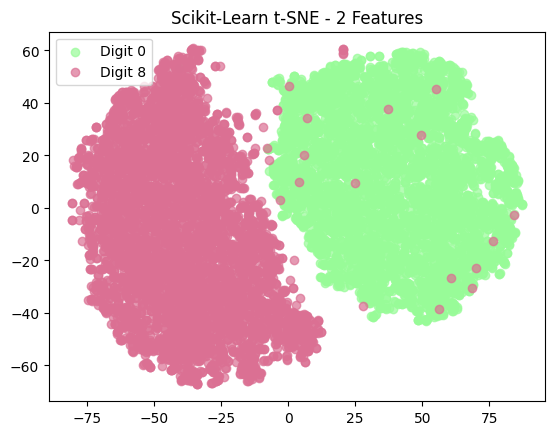

Accuracy with Scikit-Learn t-SNE: 0.99


In [19]:
from sklearn.manifold import TSNE as SklearnTSNE

# Apply t-SNE from Scikit-Learn for dimensionality reduction
tsne_sklearn = SklearnTSNE(n_components=2, perplexity=30.0, learning_rate=200.0, n_iter=1000)
X_train_tsne_sklearn = tsne_sklearn.fit_transform(X_train_sklearn)

# Train Logistic Regression model on t-SNE reduced data
model_tsne_sklearn = LogisticRegression()
model_tsne_sklearn.fit(X_train_tsne_sklearn, y_train_sklearn)

# Apply t-SNE transformation directly to the test set
X_test_tsne_sklearn = tsne_sklearn.fit_transform(X_test_sklearn)

# Predictions on the test set for Scikit-Learn t-SNE model
y_pred_tsne_sklearn = model_tsne_sklearn.predict(X_test_tsne_sklearn)

# Evaluate accuracy for Scikit-Learn t-SNE model
accuracy_tsne_sklearn = accuracy_score(y_test_sklearn, y_pred_tsne_sklearn)

# Plot the 2 new features generated by Scikit-Learn t-SNE
plt.scatter(X_train_tsne_sklearn[y_train_sklearn == 0, 0], X_train_tsne_sklearn[y_train_sklearn == 0, 1], label='Digit 0', alpha=0.7, color='palegreen')
plt.scatter(X_train_tsne_sklearn[y_train_sklearn == 1, 0], X_train_tsne_sklearn[y_train_sklearn == 1, 1], label='Digit 8', alpha=0.7, color='palevioletred')
plt.title('Scikit-Learn t-SNE - 2 Features')
plt.legend()
plt.show()

# Output the accuracy for Scikit-Learn t-SNE
print(f'Accuracy with Scikit-Learn t-SNE: {accuracy_tsne_sklearn:.2f}')


**Conclusion:**

Scikit-Learn's t-SNE implementation is significantly faster due to optimized libraries (NumPy, SciPy), low-level language use (Cython), and parallelization. The custom unsupervised library t-SNE was impractical for large datasets, whereas Scikit-Learn executed the task in about a minute with high accuracy (0.99). For efficient and reliable performance, Scikit-Learn is recommended, balancing speed and effectiveness in real-world applications.

## 8. What strategies do you know (or can think of) in order to make PCA more robust? (Bonus points for implementing them)

i create PCS_svd, in this version, SVD is used for the decomposition step, and it directly provides the principal components without the need to sort eigenvalues. SVD is often faster and more numerically stable than the eigenvalue decomposition, especially for large datasets.

In [62]:
import time
# Create a synthetic dataset
np.random.seed(42)
data = np.random.rand(5000, 900)

# Instantiate the original PCA
pca_original = PCA.PCA(n_components=10)

# Time the execution of the original PCA fit method
start_time_original = time.time()
for _ in range(10):  # Repeat for better measurement
    pca_original.fit(data)
time_original = time.time() - start_time_original

# Instantiate the ParallelPCA
pca_parallel = ParallelPCA.ParallelPCA(n_components=20,n_jobs=4)

# Time the execution of the ParallelPCA fit method
start_time_parallel = time.time()
for _ in range(10):  # Repeat for better measurement
    pca_parallel.fit(data)
time_parallel = time.time() - start_time_parallel

# Print the results
print("Original PCA Execution Time:", time_original)
print("ParallelPCA Execution Time:", time_parallel)

Original PCA Execution Time: 3.1777102947235107
ParallelPCA Execution Time: 1.824857234954834


When dealing with larger datasets or more complex computations, parallelization can indeed lead to significant time savings by distributing the workload across multiple CPU cores. Your observation aligns with the idea that the effectiveness of parallelization depends on factors such as the dataset size, task complexity, and the number of available CPU cores.

It's important to continue experimenting with different configurations and dataset sizes to ensure that parallelization consistently provides improvements across various scenarios. Keep monitoring the performance and adjust parameters as needed to achieve optimal results for your specific use case.

## 9. What are the underlying mathematical principles behind UMAP? What is it useful for?


UMAP, or Uniform Manifold Approximation and Projection, relies on a mathematical foundation rooted in manifold learning, graph theory, fuzzy sets, and optimization. At its core, UMAP begins by constructing a high-dimensional fuzzy topological graph, where each data point is connected to its nearest neighbors. This involves calculating distances between data points, typically using a Euclidean metric. The concept of fuzzy sets is then introduced to capture the strength of connections in the graph, allowing for a smooth transition between local and global structures within the data.

The optimization process in UMAP involves formulating an objective function that seeks a low-dimensional representation preserving the topological structure of the fuzzy graph. The optimization balances the retention of local and global similarities, ensuring a comprehensive representation. By intertwining these mathematical principles, UMAP effectively transforms high-dimensional data into a reduced-dimensional space while retaining intricate structural details. This process facilitates a nuanced understanding of complex datasets and finds practical applications in data analysis, particularly in disciplines such as mechanical engineering, where deciphering intricate patterns and relationships is essential for informed decision-making and optimization.

## 10. What are the underlying mathematical principles behind LDA? What is it useful for?


Latent Dirichlet Allocation (LDA) is grounded in probabilistic modeling and statistical inference, offering a mathematical framework to uncover latent topics within a collection of documents. The key principles of LDA include Bayesian probability, specifically employing a Dirichlet distribution to model the distribution of topics across documents and the distribution of words within topics. LDA operates on the assumption that each document is a mixture of topics, and each word in the document is attributed to one of these latent topics.

Mathematically, LDA formulates a generative process where documents are created by sequentially selecting topics and then generating words based on the chosen topics. The model is trained through statistical inference techniques, such as variational inference or Gibbs sampling, to estimate the underlying topic distributions and word-topic assignments.

In practical terms, LDA is valuable for topic modeling in natural language processing and document analysis. It provides a means to automatically identify topics present in a collection of texts, aiding in tasks such as document categorization, summarization, and understanding thematic structures within large corpora. The mathematical elegance of LDA makes it a powerful tool for uncovering hidden semantic structures in textual data, facilitating more effective information retrieval and analysis